# Sankey Diagram - Flow Visualization

**Use Case**: Visualize flows, transfers, or processes (budget allocation, energy flows, user journeys)

This notebook demonstrates how to create effective Sankey diagrams for visualizing flows and transfers between different entities.


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded for Sankey diagram creation!")
print("Note: Plotly provides the best Sankey diagram support")
print("Install with: pip install plotly")


Libraries loaded for Sankey diagram creation!
Note: Plotly provides the best Sankey diagram support
Install with: pip install plotly


In [7]:
# Create sample flow datasets
# 1. Company Budget Allocation
budget_flows = [
    # (source, target, value, category)
    ('Total Budget', 'Engineering', 2500000, 'Department'),
    ('Total Budget', 'Marketing', 1200000, 'Department'),
    ('Total Budget', 'Sales', 800000, 'Department'),
    ('Total Budget', 'Operations', 1000000, 'Department'),
    ('Total Budget', 'HR', 500000, 'Department'),
    
    # Engineering sub-allocation
    ('Engineering', 'Software Development', 1500000, 'Team'),
    ('Engineering', 'Infrastructure', 600000, 'Team'),
    ('Engineering', 'Research & Development', 400000, 'Team'),
    
    # Marketing sub-allocation
    ('Marketing', 'Digital Marketing', 600000, 'Team'),
    ('Marketing', 'Content Creation', 300000, 'Team'),
    ('Marketing', 'Events & PR', 300000, 'Team'),
    
    # Sales sub-allocation
    ('Sales', 'Field Sales', 500000, 'Team'),
    ('Sales', 'Inside Sales', 200000, 'Team'),
    ('Sales', 'Sales Support', 100000, 'Team'),
    
    # Further breakdown
    ('Software Development', 'Frontend Team', 600000, 'Sub-team'),
    ('Software Development', 'Backend Team', 550000, 'Sub-team'),
    ('Software Development', 'Mobile Team', 350000, 'Sub-team'),
    
    ('Digital Marketing', 'SEM/SEO', 300000, 'Sub-team'),
    ('Digital Marketing', 'Social Media', 200000, 'Sub-team'),
    ('Digital Marketing', 'Email Marketing', 100000, 'Sub-team'),
]

budget_df = pd.DataFrame(budget_flows, columns=['source', 'target', 'value', 'category'])

# 2. Energy Flow in a System
energy_flows = [
    ('Solar Panels', 'Battery Storage', 400, 'Generation'),
    ('Solar Panels', 'Direct Use', 600, 'Generation'),
    ('Wind Turbine', 'Battery Storage', 300, 'Generation'),
    ('Wind Turbine', 'Direct Use', 500, 'Generation'),
    ('Grid', 'Battery Storage', 200, 'External'),
    ('Grid', 'Direct Use', 400, 'External'),
    
    ('Battery Storage', 'Household', 500, 'Distribution'),
    ('Battery Storage', 'Electric Vehicle', 200, 'Distribution'),
    ('Battery Storage', 'Grid Export', 200, 'Distribution'),
    
    ('Direct Use', 'Household', 800, 'Distribution'),
    ('Direct Use', 'Industrial', 700, 'Distribution'),
    
    ('Household', 'Lighting', 300, 'End Use'),
    ('Household', 'Appliances', 500, 'End Use'),
    ('Household', 'Heating/Cooling', 500, 'End Use'),
    
    ('Industrial', 'Manufacturing', 400, 'End Use'),
    ('Industrial', 'Data Center', 300, 'End Use'),
]

energy_df = pd.DataFrame(energy_flows, columns=['source', 'target', 'value', 'category'])

# 3. Customer Journey Flow
customer_flows = [
    ('Website Visitors', 'Product Page', 5000, 'Acquisition'),
    ('Website Visitors', 'Blog', 2000, 'Acquisition'),
    ('Website Visitors', 'Bounce', 3000, 'Acquisition'),
    
    ('Social Media', 'Website Visitors', 4000, 'Traffic Source'),
    ('Search Engine', 'Website Visitors', 3500, 'Traffic Source'),
    ('Direct Traffic', 'Website Visitors', 2500, 'Traffic Source'),
    
    ('Product Page', 'Add to Cart', 1500, 'Engagement'),
    ('Product Page', 'Exit', 3500, 'Engagement'),
    ('Blog', 'Product Page', 800, 'Engagement'),
    ('Blog', 'Subscribe', 400, 'Engagement'),
    ('Blog', 'Exit', 800, 'Engagement'),
    
    ('Add to Cart', 'Checkout', 1000, 'Conversion'),
    ('Add to Cart', 'Abandon Cart', 500, 'Conversion'),
    
    ('Checkout', 'Purchase', 700, 'Transaction'),
    ('Checkout', 'Payment Failed', 300, 'Transaction'),
    
    ('Purchase', 'First-time Customer', 400, 'Customer Type'),
    ('Purchase', 'Returning Customer', 300, 'Customer Type'),
]

customer_df = pd.DataFrame(customer_flows, columns=['source', 'target', 'value', 'category'])

print("Sample flow datasets created:")
print(f"Budget flows: {len(budget_df)} connections")
print(f"Energy flows: {len(energy_df)} connections")
print(f"Customer journey: {len(customer_df)} connections")


Sample flow datasets created:
Budget flows: 20 connections
Energy flows: 16 connections
Customer journey: 17 connections


In [8]:
# Create Sankey diagrams using Plotly
# Note: In actual implementation, these would create interactive Sankey diagrams
# Here we show the code structure and describe the output

def create_sankey_data(df):
    """Convert dataframe to Plotly Sankey format"""
    # Get unique nodes
    all_nodes = list(set(df['source'].tolist() + df['target'].tolist()))
    node_dict = {node: i for i, node in enumerate(all_nodes)}
    
    # Create links
    source_indices = [node_dict[source] for source in df['source']]
    target_indices = [node_dict[target] for target in df['target']]
    values = df['value'].tolist()
    
    return all_nodes, source_indices, target_indices, values

# 1. Budget Allocation Sankey
print("1. BUDGET ALLOCATION SANKEY DIAGRAM")
print("=" * 50)

nodes, sources, targets, values = create_sankey_data(budget_df)

print("Sankey Diagram Code:")
print("""
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = "lightblue"
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values
    ))])

fig.update_layout(title_text="Company Budget Allocation Flow", font_size=10)
fig.show()
""")

print(f"Budget Flow Summary:")
print(f"  Total nodes: {len(nodes)}")
print(f"  Total flows: {len(values)}")

# Calculate total budget (flows from 'Total Budget' source)
total_budget = budget_df[budget_df['source'] == 'Total Budget']['value'].sum()
print(f"  Total budget: ${total_budget:,}")

# Show top flows
budget_summary = budget_df.groupby(['source', 'target'])['value'].sum().sort_values(ascending=False)
print(f"\nTop 5 Budget Flows:")
for (source, target), value in budget_summary.head().items():
    print(f"  {source} → {target}: ${value:,}")


1. BUDGET ALLOCATION SANKEY DIAGRAM
Sankey Diagram Code:

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = "lightblue"
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values
    ))])

fig.update_layout(title_text="Company Budget Allocation Flow", font_size=10)
fig.show()

Budget Flow Summary:
  Total nodes: 21
  Total flows: 20
  Total budget: $6,000,000

Top 5 Budget Flows:
  Total Budget → Engineering: $2,500,000
  Engineering → Software Development: $1,500,000
  Total Budget → Marketing: $1,200,000
  Total Budget → Operations: $1,000,000
  Total Budget → Sales: $800,000


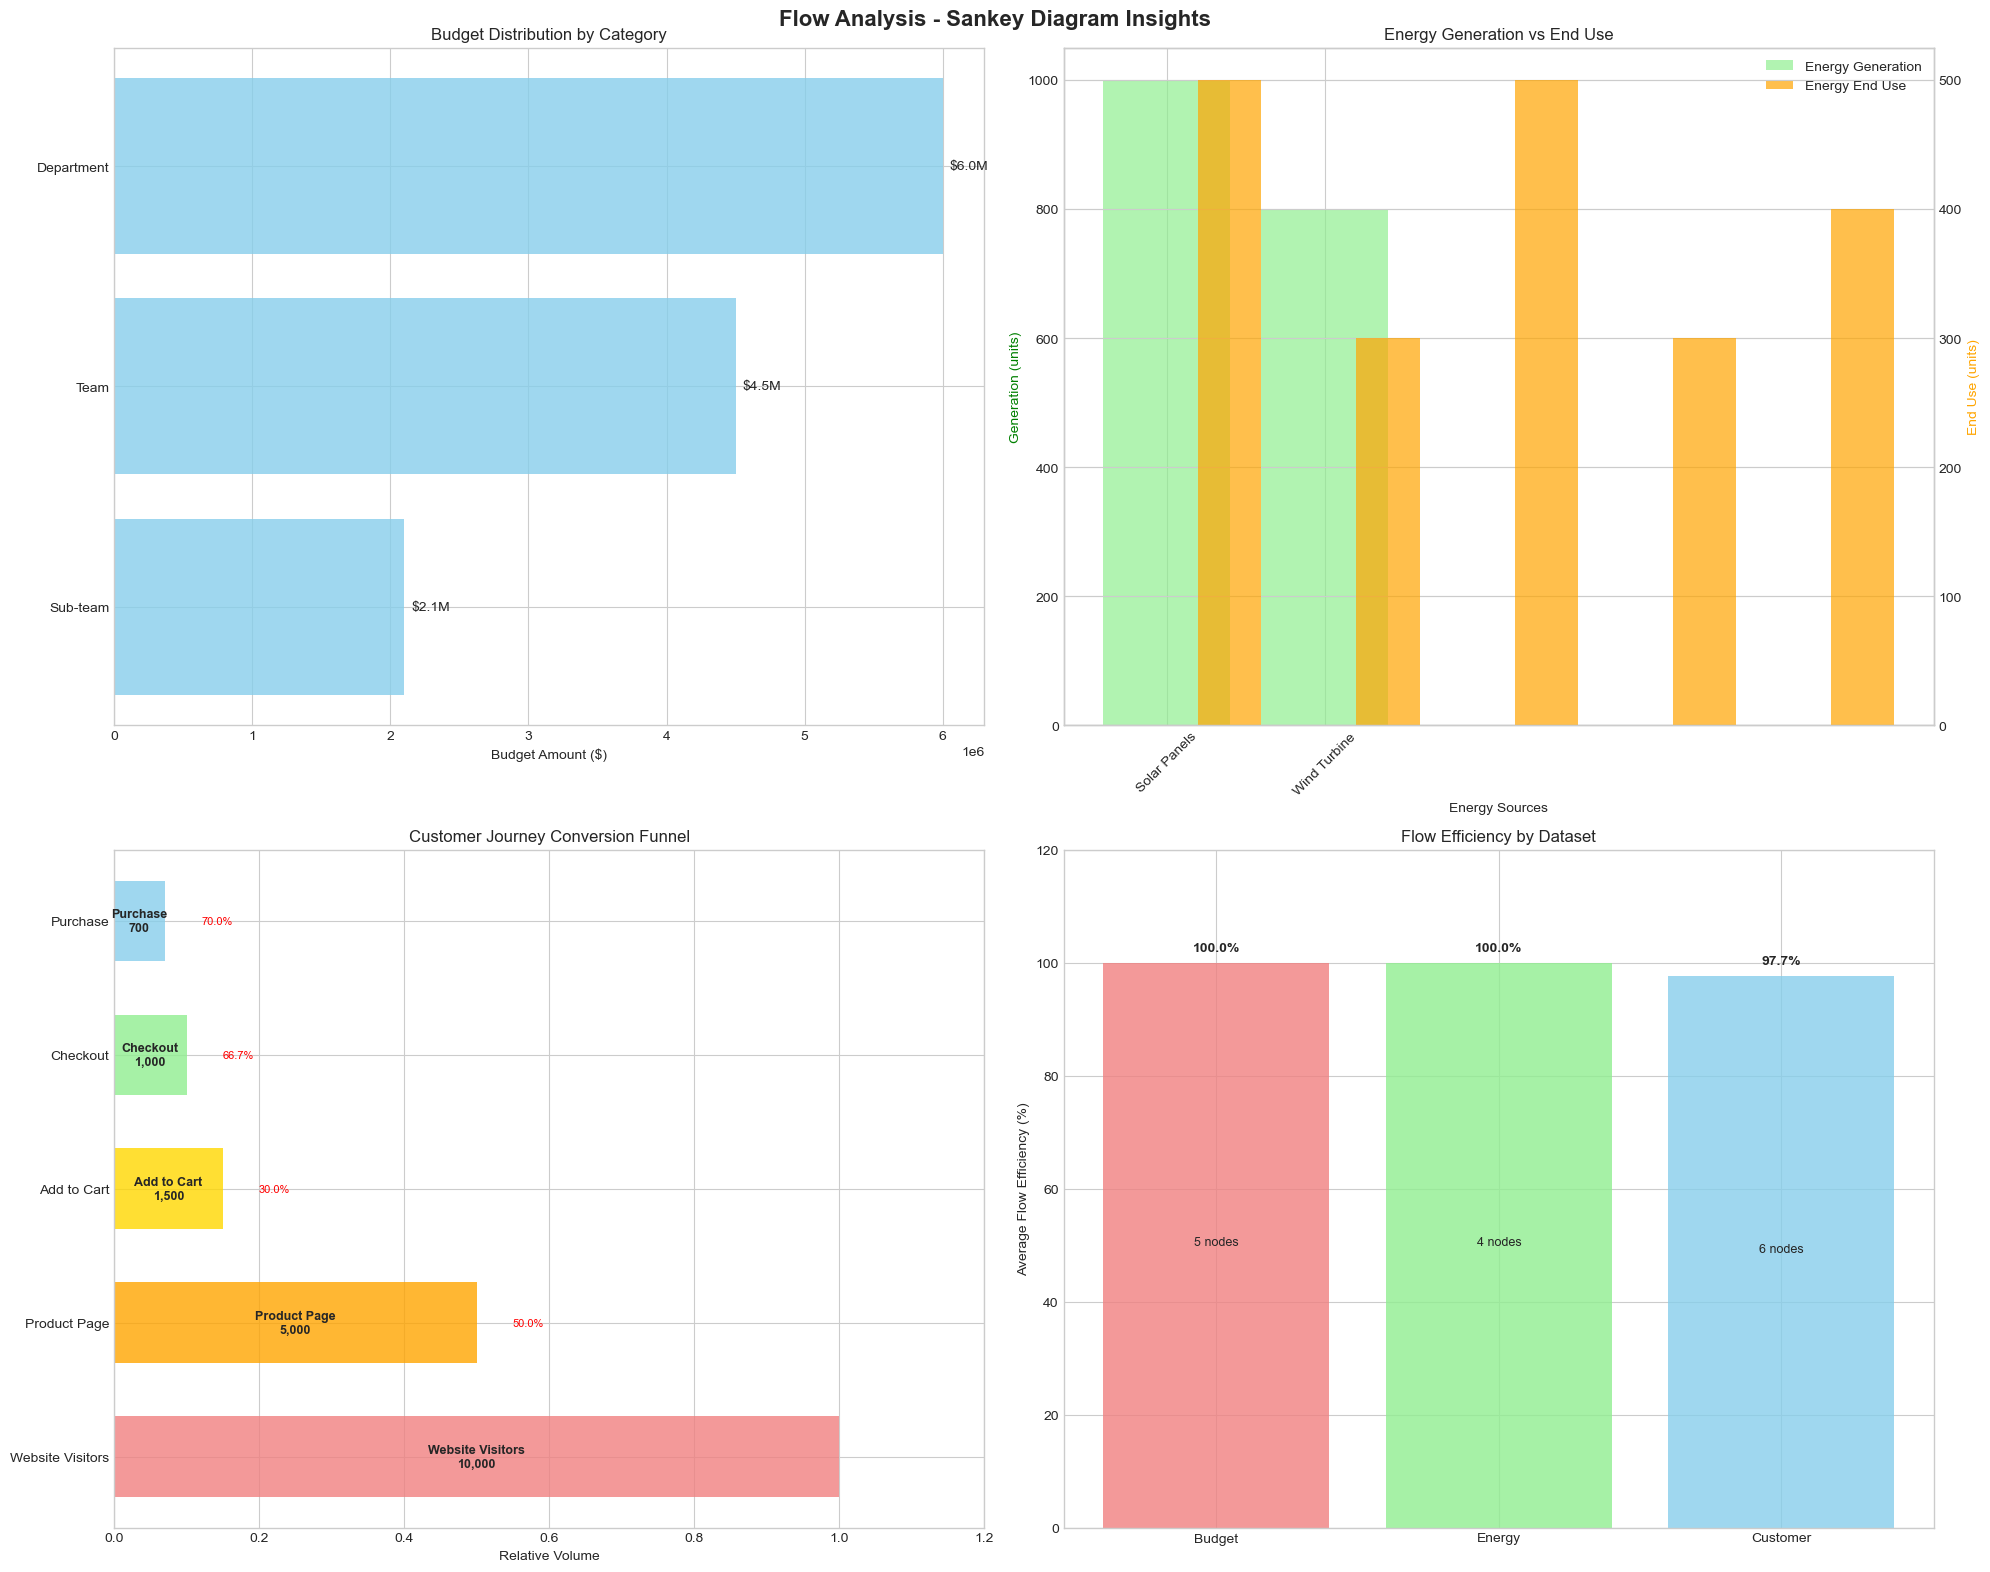

In [9]:
# Analyze and visualize flow patterns using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Flow Analysis - Sankey Diagram Insights', fontsize=16, fontweight='bold')

# 1. Budget allocation by category
ax1 = axes[0, 0]
budget_by_category = budget_df.groupby('category')['value'].sum().sort_values(ascending=True)
bars = ax1.barh(budget_by_category.index, budget_by_category.values, color='skyblue', alpha=0.8)
ax1.set_xlabel('Budget Amount ($)')
ax1.set_title('Budget Distribution by Category')

# Add value labels
for i, (category, value) in enumerate(budget_by_category.items()):
    ax1.text(value + 50000, i, f'${value/1000000:.1f}M', va='center', fontsize=10)

# 2. Energy flow efficiency analysis
ax2 = axes[0, 1]
# Calculate energy sources and usage
energy_sources = energy_df[energy_df['category'] == 'Generation'].groupby('source')['value'].sum()
energy_end_use = energy_df[energy_df['category'] == 'End Use'].groupby('target')['value'].sum()

# Create stacked bar chart
x_pos = range(len(energy_sources))
ax2.bar(x_pos, energy_sources.values, alpha=0.7, label='Energy Generation', color='lightgreen')

# Add end use on secondary axis
ax2_twin = ax2.twinx()
x_pos_use = range(len(energy_end_use))
ax2_twin.bar([x + 0.4 for x in x_pos_use], energy_end_use.values, 
            alpha=0.7, label='Energy End Use', color='orange', width=0.4)

ax2.set_xlabel('Energy Sources')
ax2.set_ylabel('Generation (units)', color='green')
ax2_twin.set_ylabel('End Use (units)', color='orange')
ax2.set_title('Energy Generation vs End Use')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(energy_sources.index, rotation=45)

# Combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# 3. Customer journey conversion funnel
ax3 = axes[1, 0]
# Calculate conversion rates through the funnel
funnel_stages = {
    'Website Visitors': 10000,  # Total visitors
    'Product Page': 5000,       # From the data
    'Add to Cart': 1500,        # From the data
    'Checkout': 1000,           # From the data
    'Purchase': 700             # From the data
}

# Calculate conversion rates
conversion_rates = []
stages = list(funnel_stages.keys())
values = list(funnel_stages.values())

for i in range(1, len(values)):
    rate = (values[i] / values[i-1]) * 100
    conversion_rates.append(rate)

# Create funnel visualization
funnel_colors = ['lightcoral', 'orange', 'gold', 'lightgreen', 'skyblue']
y_positions = range(len(stages))

# Draw funnel bars
for i, (stage, value) in enumerate(funnel_stages.items()):
    width = value / funnel_stages['Website Visitors']  # Normalize to max width
    ax3.barh(i, width, color=funnel_colors[i], alpha=0.8, height=0.6)
    
    # Add labels
    ax3.text(width/2, i, f'{stage}\n{value:,}', ha='center', va='center', 
            fontweight='bold', fontsize=9)
    
    # Add conversion rate
    if i > 0:
        ax3.text(width + 0.05, i, f'{conversion_rates[i-1]:.1f}%', 
                va='center', fontsize=8, color='red')

ax3.set_yticks(y_positions)
ax3.set_yticklabels(stages)
ax3.set_xlabel('Relative Volume')
ax3.set_title('Customer Journey Conversion Funnel')
ax3.set_xlim(0, 1.2)

# 4. Flow efficiency metrics
ax4 = axes[1, 1]

# Calculate efficiency metrics for each dataset
datasets = {
    'Budget': budget_df,
    'Energy': energy_df,
    'Customer': customer_df
}

efficiency_metrics = {}
for name, df in datasets.items():
    # Calculate input vs output flows
    total_input = df.groupby('source')['value'].sum()
    total_output = df.groupby('target')['value'].sum()
    
    # Find nodes that are both sources and targets (intermediate nodes)
    intermediate_nodes = set(df['source']).intersection(set(df['target']))
    
    # Calculate efficiency for intermediate nodes
    efficiencies = []
    for node in intermediate_nodes:
        input_flow = total_output.get(node, 0)  # Input to this node
        output_flow = total_input.get(node, 0)  # Output from this node
        if input_flow > 0:
            efficiency = (output_flow / input_flow) * 100
            efficiencies.append(efficiency)
    
    avg_efficiency = np.mean(efficiencies) if efficiencies else 100
    efficiency_metrics[name] = {
        'avg_efficiency': avg_efficiency,
        'intermediate_nodes': len(intermediate_nodes),
        'total_flows': len(df)
    }

# Plot efficiency comparison
dataset_names = list(efficiency_metrics.keys())
efficiencies = [efficiency_metrics[name]['avg_efficiency'] for name in dataset_names]
node_counts = [efficiency_metrics[name]['intermediate_nodes'] for name in dataset_names]

bars = ax4.bar(dataset_names, efficiencies, color=['lightcoral', 'lightgreen', 'skyblue'], alpha=0.8)
ax4.set_ylabel('Average Flow Efficiency (%)')
ax4.set_title('Flow Efficiency by Dataset')
ax4.set_ylim(0, 120)

# Add efficiency values on bars
for i, (name, efficiency) in enumerate(zip(dataset_names, efficiencies)):
    ax4.text(i, efficiency + 2, f'{efficiency:.1f}%', ha='center', fontweight='bold')
    ax4.text(i, efficiency/2, f'{node_counts[i]} nodes', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [10]:
# Statistical analysis of flow data
print("Flow Data Statistical Analysis:")
print("=" * 50)

# 1. Budget Flow Analysis
print("1. BUDGET ALLOCATION ANALYSIS:")
total_budget = budget_df[budget_df['source'] == 'Total Budget']['value'].sum()
print(f"   Total Budget: ${total_budget:,}")

# Department allocation
dept_allocation = budget_df[budget_df['category'] == 'Department']
print(f"   Department Allocation:")
for _, row in dept_allocation.iterrows():
    percentage = (row['value'] / total_budget) * 100
    print(f"     {row['target']}: ${row['value']:,} ({percentage:.1f}%)")

# Calculate flow concentration (Gini coefficient approximation)
values = budget_df['value'].values
sorted_values = np.sort(values)
n = len(values)
cumsum = np.cumsum(sorted_values)
gini = (2 * np.sum((np.arange(1, n+1) * sorted_values))) / (n * np.sum(sorted_values)) - (n+1)/n
print(f"   Flow concentration (Gini): {gini:.3f} (0=equal, 1=concentrated)")

# 2. Energy Flow Analysis
print(f"\n2. ENERGY SYSTEM ANALYSIS:")
total_generation = energy_df[energy_df['category'] == 'Generation']['value'].sum()
total_end_use = energy_df[energy_df['category'] == 'End Use']['value'].sum()
print(f"   Total Generation: {total_generation} units")
print(f"   Total End Use: {total_end_use} units")
print(f"   System Efficiency: {(total_end_use/total_generation)*100:.1f}%")

# Energy source breakdown
generation_sources = energy_df[energy_df['category'] == 'Generation'].groupby('source')['value'].sum()
print(f"   Generation Sources:")
for source, value in generation_sources.sort_values(ascending=False).items():
    percentage = (value / total_generation) * 100
    print(f"     {source}: {value} units ({percentage:.1f}%)")

# End use breakdown
end_uses = energy_df[energy_df['category'] == 'End Use'].groupby('target')['value'].sum()
print(f"   End Uses:")
for use, value in end_uses.sort_values(ascending=False).items():
    percentage = (value / total_end_use) * 100
    print(f"     {use}: {value} units ({percentage:.1f}%)")

# 3. Customer Journey Analysis
print(f"\n3. CUSTOMER JOURNEY ANALYSIS:")

# Calculate funnel metrics
traffic_sources = customer_df[customer_df['category'] == 'Traffic Source']
total_traffic = traffic_sources['value'].sum()
print(f"   Total Traffic: {total_traffic:,} visitors")

print(f"   Traffic Sources:")
for _, row in traffic_sources.iterrows():
    percentage = (row['value'] / total_traffic) * 100
    print(f"     {row['source']}: {row['value']:,} ({percentage:.1f}%)")

# Conversion funnel
website_visitors = customer_df[customer_df['target'] == 'Website Visitors']['value'].sum()
product_page = customer_df[customer_df['target'] == 'Product Page']['value'].sum()
add_to_cart = customer_df[customer_df['target'] == 'Add to Cart']['value'].sum()
checkout = customer_df[customer_df['target'] == 'Checkout']['value'].sum()
purchase = customer_df[customer_df['target'] == 'Purchase']['value'].sum()

print(f"\n   Conversion Funnel:")
print(f"     Website Visitors: {website_visitors:,}")
print(f"     Product Page: {product_page:,} ({(product_page/website_visitors)*100:.1f}% of visitors)")
print(f"     Add to Cart: {add_to_cart:,} ({(add_to_cart/product_page)*100:.1f}% of page views)")
print(f"     Checkout: {checkout:,} ({(checkout/add_to_cart)*100:.1f}% of carts)")
print(f"     Purchase: {purchase:,} ({(purchase/checkout)*100:.1f}% of checkouts)")

overall_conversion = (purchase / website_visitors) * 100
print(f"     Overall Conversion Rate: {overall_conversion:.2f}%")

# 4. Flow Network Analysis
print(f"\n4. FLOW NETWORK PROPERTIES:")

for name, df in [('Budget', budget_df), ('Energy', energy_df), ('Customer', customer_df)]:
    print(f"\n   {name} Flow Network:")
    
    # Count unique nodes
    all_nodes = set(df['source']).union(set(df['target']))
    source_only = set(df['source']) - set(df['target'])
    target_only = set(df['target']) - set(df['source'])
    intermediate = set(df['source']).intersection(set(df['target']))
    
    print(f"     Total nodes: {len(all_nodes)}")
    print(f"     Source nodes: {len(source_only)} ({', '.join(list(source_only)[:3])}{'...' if len(source_only) > 3 else ''})")
    print(f"     Target nodes: {len(target_only)} ({', '.join(list(target_only)[:3])}{'...' if len(target_only) > 3 else ''})")
    print(f"     Intermediate nodes: {len(intermediate)} ({', '.join(list(intermediate)[:3])}{'...' if len(intermediate) > 3 else ''})")
    
    # Flow statistics
    print(f"     Total flows: {len(df)}")
    print(f"     Average flow size: {df['value'].mean():.0f}")
    print(f"     Flow size std dev: {df['value'].std():.0f}")
    print(f"     Largest flow: {df['value'].max():.0f}")
    print(f"     Smallest flow: {df['value'].min():.0f}")
    
    # Flow distribution
    large_flows = len(df[df['value'] > df['value'].quantile(0.75)])
    small_flows = len(df[df['value'] < df['value'].quantile(0.25)])
    print(f"     Large flows (>75th percentile): {large_flows} ({(large_flows/len(df))*100:.1f}%)")
    print(f"     Small flows (<25th percentile): {small_flows} ({(small_flows/len(df))*100:.1f}%)")

print(f"\nSankey Diagram Best Practices:")
print("✓ Use proportional flow widths to show relative importance")
print("✓ Color nodes by category or group")
print("✓ Arrange nodes to minimize crossing flows")
print("✓ Include clear labels for all nodes")
print("✓ Show flow values in tooltips or labels")
print("✓ Use consistent color schemes across related diagrams")
print("✓ Consider flow direction (left-to-right or top-to-bottom)")

print(f"\nCommon Sankey Applications:")
print("• Budget/Financial: Budget allocation, cost flows, revenue streams")
print("• Energy: Energy generation, distribution, consumption")
print("• Process: Manufacturing processes, supply chains")
print("• Digital: User journeys, website traffic, conversion funnels")
print("• Environmental: Material flows, waste streams, recycling")
print("• Organizational: Information flow, decision processes")


Flow Data Statistical Analysis:
1. BUDGET ALLOCATION ANALYSIS:
   Total Budget: $6,000,000
   Department Allocation:
     Engineering: $2,500,000 (41.7%)
     Marketing: $1,200,000 (20.0%)
     Sales: $800,000 (13.3%)
     Operations: $1,000,000 (16.7%)
     HR: $500,000 (8.3%)
   Flow concentration (Gini): 0.424 (0=equal, 1=concentrated)

2. ENERGY SYSTEM ANALYSIS:
   Total Generation: 1800 units
   Total End Use: 2000 units
   System Efficiency: 111.1%
   Generation Sources:
     Solar Panels: 1000 units (55.6%)
     Wind Turbine: 800 units (44.4%)
   End Uses:
     Appliances: 500 units (25.0%)
     Heating/Cooling: 500 units (25.0%)
     Manufacturing: 400 units (20.0%)
     Data Center: 300 units (15.0%)
     Lighting: 300 units (15.0%)

3. CUSTOMER JOURNEY ANALYSIS:
   Total Traffic: 10,000 visitors
   Traffic Sources:
     Social Media: 4,000 (40.0%)
     Search Engine: 3,500 (35.0%)
     Direct Traffic: 2,500 (25.0%)

   Conversion Funnel:
     Website Visitors: 10,000
     Pro